# EDA - Proyecto Indivudual N° 2: Criptomonedas

## Objetivo de presente analisis exploratorio de los datos.
El onbjetivo principal del siguiente EDA es consultarlos y conocerlos para identificar patrones, tendencias y relaciones entre las variables, antes de hacer cualquier suposicion.
Si bien el analisis de los datos se hara sobre una blosa de criptomonendas acotada (10), para poder definir cuales seran estas se procede a dicho analisis para asi poder definir las mas representativas segun los criterios que surgan como mas aptos.
En virtud de lo antes dicho, nos volcaremos a analizar:
1- Valores Flatantes.
2- Registros duplicados.
3- Valores atipicos/extremos (outliers).
4- Entre otras cuestiones que surgen relevantes.

## Indice.
1- Obtencion de los datos. 
2- Diccionario del dataset.
3- Descripcion general del dataset. Shape y valores nulos.
4- Medidas de Tendencia Central de variables numéricas.
5- Análisis de las variables categóricas.
6- Outliers.
 6.1. Precio
 6.3. Capitalizacion de mercado
 6.3. Volumen tortal de operacion
7- Cartera de criptomonedas.
8- Serie de tiempo de la cartera definida.
9- KPIs
 9.1. Desviacion Estandar.
 9.2. Capitalizacion de Mercado.
 9.3. Volumen de operacion


## 1- Obtencion de los datos

In [214]:
import json
import requests
import os
import pandas as pd

# Obtener los dastos de CoinGecko
response = requests.get("https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd")
data = response.json()

# Convertir los dsatos a un dataframe
df_coint = pd.DataFrame(data)

df_coint.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,25966.000000,505334532485,1,5.451093e+11,1.199002e+10,26200.000000,...,2.100000e+07,2.100000e+07,69045.00,-62.41928,2021-11-10T14:24:11.849Z,67.810000,38165.60610,2013-07-06T00:00:00.000Z,None,2023-08-25T20:08:47.512Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1645.330000,197834905602,2,1.978349e+11,7.258470e+09,1664.660000,...,1.202164e+08,NaN,4878.26,-66.26873,2021-11-10T14:24:19.604Z,0.432979,379941.41386,2015-10-20T00:00:00.000Z,"{'times': 83.72952765176329, 'currency': 'btc'...",2023-08-25T20:08:49.520Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999503,82779760569,3,8.277976e+10,1.122434e+10,1.002000,...,8.284913e+10,NaN,1.32,-24.48294,2018-07-24T00:00:00.000Z,0.572521,74.51983,2015-03-02T00:00:00.000Z,None,2023-08-25T20:05:00.524Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,217.300000,33421449941,4,4.344506e+10,3.899541e+08,219.050000,...,1.538562e+08,2.000000e+08,686.31,-68.35728,2021-05-10T07:24:17.097Z,0.039818,545300.82367,2017-10-19T00:00:00.000Z,None,2023-08-25T20:08:53.778Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.524068,27780175668,5,5.250042e+10,9.236828e+08,0.529816,...,9.998849e+10,1.000000e+11,3.40,-84.54826,2018-01-07T00:00:00.000Z,0.002686,19448.74830,2014-05-22T00:00:00.000Z,None,2023-08-25T20:08:49.310Z


In [215]:
# A los efectos de una mayor comprencion, pasaremos el nombre de las variables al castellano.
df_coint = df_coint.rename(columns={'symbol' : 'simbolo', 'name' : 'nombre', 'image' : 'imagen',
                                    'current_price' : 'precio_actual', 'market_cap' : 'capit_mercado', 'market_cap_rank' : 'rengo_capit_mercado',
                                    'fully_diluted_valuation' : 'val_completa_diluida', 'total_volume' : 'volumen_total', 'high_24h' : 'max_24hs',
                                    'low_24h' : 'mínimo_24hs', 'price_change_24h' : 'cambio_precio_24hs', 'price_change_percentage_24h' : 'cambio_%_precio_24hs',
                                    'market_cap_change_24h' : 'cambio_capitali_24hs', 'market_cap_change_percentage_24h' : 'cambio_%_capitali_24hs', 'circulating_supply' : 'suministro_circulante',
                                    'total_supply' : 'suministro_total', 'max_supply' : 'suministro_máximo', 'ath' : 'máximo_histórico', 'ath_change_percentage' : 'cambio_%_ath',
                                    'ath_date' : 'fecha_ath', 'atl':'minimo_historico', 'atl_change_percentage':'cambio_%_atl',	'atl_date':'fecha_atl',
                                    'roi':'roi', 'last_updated':'fecha_ultima_actualizacion'})

## 2- Diccionario del dataset.

- **nombre**: El nombre de la criptomoneda.
- **image**: Una imagen que representa la criptomoneda.
- **precio_actual**: El precio actual de la criptomoneda en dólares estadounidenses (USD).
- **capit_mercado**: La capitalización de mercado de la criptomoneda, que se calcula multiplicando el precio actual por el número total de monedas en circulación.
- **rango_capit_mercado**: La posición de la criptomoneda en términos de capitalización de mercado en comparación con otras criptomonedas.
- **val_completa_diluida**: La valoración total diluida de la criptomoneda, que tiene en cuenta todas las monedas que se emitirán en el futuro.
- **volumen_total**: El volumen total de operaciones realizadas con la criptomoneda en las últimas 24 horas.
- **max_24h**: El precio más alto alcanzado por la criptomoneda en las últimas 24 horas.
- **min_24hs**: El precio más bajo alcanzado por la criptomoneda en las últimas 24 horas.
- **cambio_precio_24hs**: El cambio en el precio de la criptomoneda en las últimas 24 horas.
- **cambio_%_precio_24hs**: El porcentaje de cambio en el precio de la criptomoneda en las últimas 24 horas.
- **cambio_capitali_24hs**: El cambio en la capitalización de mercado de la criptomoneda en las últimas 24 horas.
- **cambio_%_capitali_24hs**: El porcentaje de cambio en la capitalización de mercado de la criptomoneda en las últimas 24 horas.
- **suministro_circulante**: La cantidad total de monedas que están actualmente en circulación para la criptomoneda.
- **suministro_total**: La cantidad total de monedas que se emitirán para la criptomoneda.
- **suministro_maximo**: La cantidad máxima de monedas que se emitirán para la criptomoneda.
- **maximo_historico**: El precio más alto alcanzado por la criptomoneda en toda su historia.
- **cambio_%_ath**: El porcentaje de cambio entre el precio actual y el precio más alto alcanzado por la criptomoneda en toda su historia.
- **fecha_ath**: La fecha en que se alcanzó el precio más alto de la criptomoneda.
- **minimo_historico**: El precio más bajo alcanzado por la criptomoneda en toda su historia.
- **cambio_%_atl**: El porcentaje de cambio entre el precio actual y el precio más bajo alcanzado por la criptomoneda en toda su historia.
- **fecha_atl**: La fecha en que se alcanzó el precio más bajo de la criptomoneda.
- **roi**: El retorno de inversión (ROI) para la criptomoneda, que se calcula como el porcentaje de ganancia o pérdida en una inversión durante un período determinado.
- **fecha_ultima_actualizacion**: La fecha y hora en que se actualizó por última vez la información sobre la criptomoneda.

## 3-Descripcion general del dataset. Shape y valores nulos.

In [216]:
df_coint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          100 non-null    object 
 1   simbolo                     100 non-null    object 
 2   nombre                      100 non-null    object 
 3   imagen                      100 non-null    object 
 4   precio_actual               100 non-null    float64
 5   capit_mercado               100 non-null    int64  
 6   rengo_capit_mercado         100 non-null    int64  
 7   val_completa_diluida        94 non-null     float64
 8   volumen_total               100 non-null    float64
 9   max_24hs                    100 non-null    float64
 10  mínimo_24hs                 100 non-null    float64
 11  cambio_precio_24hs          100 non-null    float64
 12  cambio_%_precio_24hs        100 non-null    float64
 13  cambio_capitali_24hs        100 non-

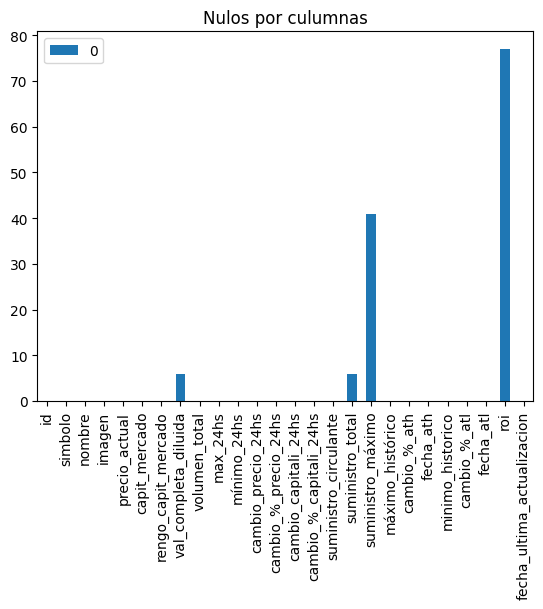

In [217]:
import matplotlib.pyplot as plt
import pandas as pd

df_nullos = pd.DataFrame(df_coint.isnull().sum())

# Crear gráfico de barras
df_nullos.plot.bar()
plt.title("Nulos por culumnas")
# Mostrar gráfico
plt.show()

El dataframe cuenta con 100 registros y 26 columnas. 
Ademas las columnas 'roi', 'suminstro_maximo', 'val_completa_diluida' y 'suministro_total'  tiene valores nulos; en ese orden de mayor a menor. 

## 4- Medidas de Tendencia Central de variables numéricas

In [218]:
import numpy as np
df_coint.describe(include=[np.number])

,precio_actual,capit_mercado,rengo_capit_mercado,val_completa_diluida,volumen_total,max_24hs,mínimo_24hs,cambio_precio_24hs,cambio_%_precio_24hs,cambio_capitali_24hs,cambio_%_capitali_24hs,suministro_circulante,suministro_total,suministro_máximo,máximo_histórico,cambio_%_ath,minimo_historico,cambio_%_atl
count,1.000000e+02,1.000000e+02,100.000000,9.400000e+01,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,1.000000e+02,9.400000e+01,5.900000e+01,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,6.458852e+02,1.037723e+10,50.500000,1.260867e+10,4.522469e+08,6.517204e+02,6.420328e+02,-1.798129,-0.577569,-1.843431e+07,-0.700384,1.987500e+13,2.595159e+13,2.427492e+13,1775.919468,-74.626392,8.906986e+01,1.706541e+05
std,3.661869e+03,5.448784e+10,29.011492,6.001836e+10,1.815905e+09,3.693583e+03,3.640671e+03,9.754624,3.463639,1.210836e+08,3.459231,1.185096e+14,1.500620e+14,1.391324e+14,9838.927777,27.221671,3.953026e+02,1.433371e+06
min,4.061460e-07,3.506433e+08,1.000000,3.756659e+08,4.941880e+03,4.158420e-07,4.056370e-07,-76.217526,-14.951380,-9.215733e+08,-15.434060,1.627895e+05,1.627895e+05,1.627895e+05,0.000003,-99.999950,5.636600e-11,3.373200e-01
25%,3.156542e-01,4.909030e+08,25.750000,6.574101e+08,9.609794e+06,3.198878e-01,3.127713e-01,-0.080505,-1.722190,-1.610355e+07,-1.844640,1.283279e+08,1.656546e+08,2.005250e+08,1.327500,-94.033625,1.800944e-02,5.593093e+01
50%,1.094937e+00,7.426849e+08,50.500000,1.239467e+09,2.833537e+07,1.106500e+00,1.079295e+00,-0.000817,-0.237055,-3.524505e+06,-0.311825,7.802452e+08,1.000000e+09,1.000000e+09,10.920000,-86.296260,3.613790e-01,3.606782e+02
75%,7.137500e+00,2.966529e+09,75.250000,5.444330e+09,1.011447e+08,7.185000e+00,7.000000e+00,0.001029,0.222142,1.611925e+06,0.164303,3.564873e+09,9.722222e+09,9.444444e+09,103.107500,-66.122662,9.488002e-01,4.177515e+03
max,2.598600e+04,5.053345e+11,100.000000,5.451093e+11,1.199002e+10,2.620200e+04,2.583100e+04,1.970000,26.733400,4.708793e+08,26.520940,9.514217e+14,9.999846e+14,9.900000e+14,70643.000000,-4.411780,3.139170e+03,1.430510e+07


## 5- Análisis de las variables categóricas

In [220]:
df_coint.describe(include=object)

,id,simbolo,nombre,imagen,fecha_ath,fecha_atl,roi,fecha_ultima_actualizacion
count,100,100,100,100,100,100,23,100
unique,100,100,100,100,100,98,23,100
top,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,2021-11-10T14:24:11.849Z,2019-09-28T00:00:00.000Z,"{'times': 83.72952765176329, 'currency': 'btc'...",2023-08-25T20:08:47.512Z
freq,1,1,1,1,1,2,1,1


## 6- Outliers

Procedo a buscar posibles valores atipicos entre las variables precio, capitalizacion de mercado y volumne total de las operaciones realizadas. El proposito de esto es a los efectos de orientar en la eleccion de la cartera de criptomonedas a definir y analisar en el dashboard

## 6.1. Por Precio

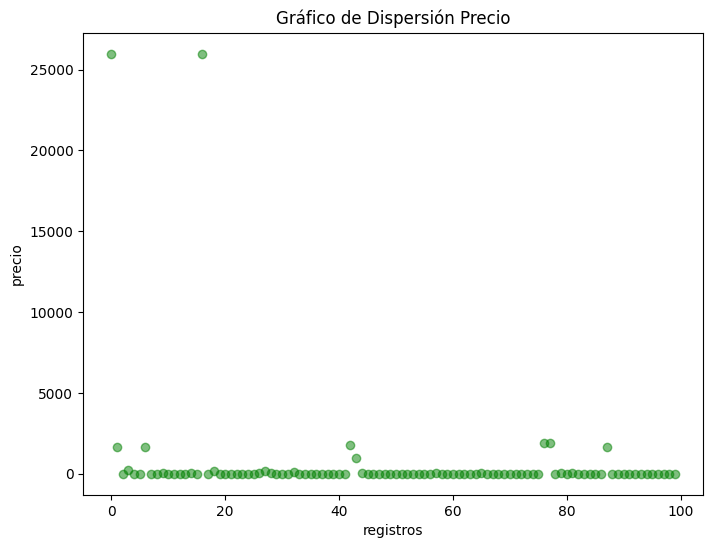

In [221]:
# Gráfico de dispersión variable precio_actual
plt.figure(figsize=(8, 6))
plt.scatter(df_coint.index, df_coint['precio_actual'], color='green', alpha=0.5)
plt.xlabel('registros')
plt.ylabel('precio')
plt.title('Gráfico de Dispersión Precio')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [222]:
# Filtrar DataFrame para mostrar solo las filas con valores atípicos
outliers_precio = pd.DataFrame(df_coint[df_coint['precio_actual'] > 1000])
outliers_precio.info()

# Mostrar las filas con valores atípicos
outliers_precio_cripto = outliers_precio.loc[:, ['nombre', 'precio_actual']]
outliers_precio_cripto = outliers_precio_cripto.sort_values(by='precio_actual', ascending=False)
outliers_precio_cripto.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 87
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9 non-null      object 
 1   simbolo                     9 non-null      object 
 2   nombre                      9 non-null      object 
 3   imagen                      9 non-null      object 
 4   precio_actual               9 non-null      float64
 5   capit_mercado               9 non-null      int64  
 6   rengo_capit_mercado         9 non-null      int64  
 7   val_completa_diluida        9 non-null      float64
 8   volumen_total               9 non-null      float64
 9   max_24hs                    9 non-null      float64
 10  mínimo_24hs                 9 non-null      float64
 11  cambio_precio_24hs          9 non-null      float64
 12  cambio_%_precio_24hs        9 non-null      float64
 13  cambio_capitali_24hs        9 non-null

,nombre,precio_actual
16,Wrapped Bitcoin,25986.00
0,Bitcoin,25966.00
77,Tether Gold,1913.56
76,PAX Gold,1901.87
42,Rocket Pool ETH,1787.92
6,Lido Staked Ether,1646.12
1,Ethereum,1645.33
87,Frax Ether,1644.31
43,Maker,1003.50


## 6.2. Capitalizacion de Mercado

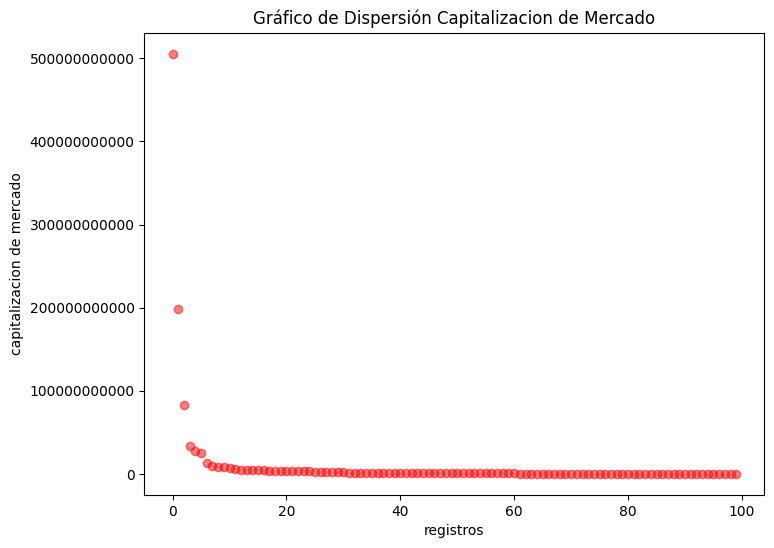

In [223]:
plt.figure(figsize=(8, 6))
plt.scatter(df_coint.index, df_coint['capit_mercado'], color='red', alpha=0.5)
plt.xlabel('registros')
plt.ylabel('capitalizacion de mercado')
plt.title('Gráfico de Dispersión Capitalizacion de Mercado')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [224]:
# Filtrar DataFrame para mostrar solo las filas con valores atípicos
outliers_cap = pd.DataFrame(df_coint[df_coint['capit_mercado'] > 5000000000])
outliers_cap.info()

# Mostrar las filas con valores atípicos
#outliers_cap_cripto = outliers_cap.loc[:, ['nombre', 'capit_mercado']]
#outliers_cap_cripto.head(20)

outliers_cap_cripto = outliers_cap.loc[:, ['nombre', 'capit_mercado']]
outliers_cap_cripto = outliers_cap_cripto.sort_values(by='capit_mercado', ascending=False)
outliers_cap_cripto.head(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13 non-null     object 
 1   simbolo                     13 non-null     object 
 2   nombre                      13 non-null     object 
 3   imagen                      13 non-null     object 
 4   precio_actual               13 non-null     float64
 5   capit_mercado               13 non-null     int64  
 6   rengo_capit_mercado         13 non-null     int64  
 7   val_completa_diluida        13 non-null     float64
 8   volumen_total               13 non-null     float64
 9   max_24hs                    13 non-null     float64
 10  mínimo_24hs                 13 non-null     float64
 11  cambio_precio_24hs          13 non-null     float64
 12  cambio_%_precio_24hs        13 non-null     float64
 13  cambio_capitali_24hs        13 non-nu

,nombre,capit_mercado
0,Bitcoin,505334532485
1,Ethereum,197834905602
2,Tether,82779760569
3,BNB,33421449941
4,XRP,27780175668
5,USD Coin,25857383087
6,Lido Staked Ether,13782413016
7,Cardano,9101540359
8,Dogecoin,8812540640
9,Solana,8246327031


## 6.3. Volumen tortal de operacion

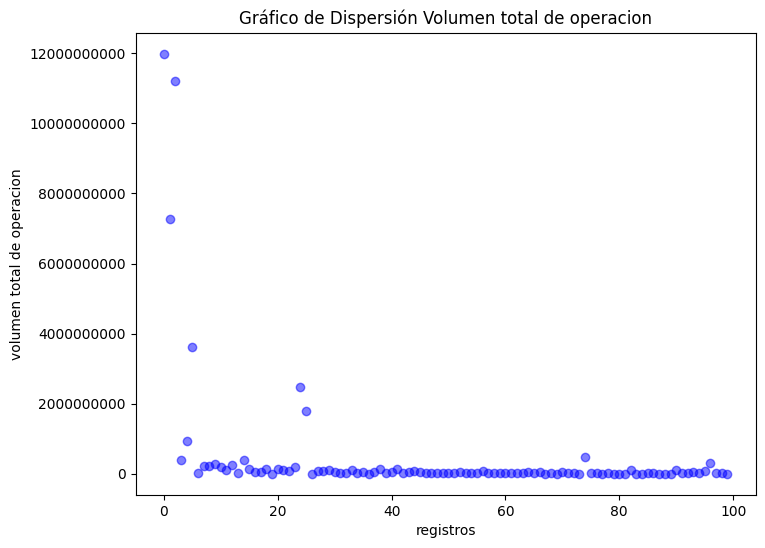

In [225]:
plt.figure(figsize=(8, 6))
plt.scatter(df_coint.index, df_coint['volumen_total'], color='blue', alpha=0.5)
plt.xlabel('registros')
plt.ylabel('volumen total de operacion')
plt.title('Gráfico de Dispersión Volumen total de operacion')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [226]:
# Filtrar DataFrame para mostrar solo las filas con valores atípicos
outliers_vol = pd.DataFrame(df_coint[df_coint['volumen_total'] > 500000000])
outliers_vol.info()

# Mostrar las filas con valores atípicos
outliers_vol_cripto = outliers_vol.loc[:, ['nombre', 'volumen_total']]
outliers_vol_cripto = outliers_vol_cripto.sort_values(by='volumen_total', ascending=False)
outliers_vol_cripto.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 25
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          7 non-null      object 
 1   simbolo                     7 non-null      object 
 2   nombre                      7 non-null      object 
 3   imagen                      7 non-null      object 
 4   precio_actual               7 non-null      float64
 5   capit_mercado               7 non-null      int64  
 6   rengo_capit_mercado         7 non-null      int64  
 7   val_completa_diluida        7 non-null      float64
 8   volumen_total               7 non-null      float64
 9   max_24hs                    7 non-null      float64
 10  mínimo_24hs                 7 non-null      float64
 11  cambio_precio_24hs          7 non-null      float64
 12  cambio_%_precio_24hs        7 non-null      float64
 13  cambio_capitali_24hs        7 non-null

,nombre,volumen_total
0,Bitcoin,1.199002e+10
2,Tether,1.122434e+10
1,Ethereum,7.258470e+09
5,USD Coin,3.630189e+09
24,Binance USD,2.473674e+09
25,TrueUSD,1.778709e+09
4,XRP,9.236828e+08


## 7- Cartera de Criptomonedas

In [227]:
merged_df = pd.merge(outliers_precio_cripto, outliers_cap_cripto, on='nombre', how='outer')
merged_df = pd.merge(merged_df, outliers_vol_cripto, on='nombre', how='outer')


In [228]:
merged_df['cantidad_datos'] = merged_df.count(axis=1) - 1
merged_df = merged_df.sort_values(by='cantidad_datos', ascending=False)

merged_df.head(10)

,nombre,precio_actual,capit_mercado,volumen_total,cantidad_datos
6,Ethereum,1645.33,1.978349e+11,7.258470e+09,3
1,Bitcoin,25966.00,5.053345e+11,1.199002e+10,3
5,Lido Staked Ether,1646.12,1.378241e+10,NaN,2
9,Tether,NaN,8.277976e+10,1.122434e+10,2
11,XRP,NaN,2.778018e+10,9.236828e+08,2
12,USD Coin,NaN,2.585738e+10,3.630189e+09,2
0,Wrapped Bitcoin,25986.00,NaN,NaN,1
14,Dogecoin,NaN,8.812541e+09,NaN,1
19,Binance USD,NaN,NaN,2.473674e+09,1
18,Polygon,NaN,5.056305e+09,NaN,1


## Solo dos criptomonedas presentan valores atipicos conciderando tanto el precio, capitalizacion de mercado y volumen de neogociacion, Bitcoin y Ethereum.
La capitalización de mercado se calcula multiplicando el precio actual de una criptomoneda por su suministro circulante. El volumen total de operación se refiere a la cantidad total de una criptomoneda que se ha comprado y vendido en un período determinado. En general, se cree que un aumento en la capitalización de mercado y el volumen total de operación indica una mayor demanda y popularidad de una criptomoneda, lo que puede llevar a un aumento en su precio. 
Esto nos lleva a concluir que existe una relacion directa, aunque no necesariamente propropcional, entre estas cuatro variables.

## Sin embargo, es importante tener en cuenta que hay muchos factores que pueden afectar el precio de una criptomoneda, incluidos los eventos del mercado y las noticias económicas.

A los efectos del analisis del dataset, he elegido las 10 criptomonedas con valores atipicos en las variables antes mencionadas, priorizando las que presentan dicho comportamiento en la mayor cantidad de dichas variables.
Vale aclarar que este criterio busca abarcar las criptomonedas mas relevantes de mercado, siendo que la gran mayoria de criptos estan muy alejadas de estos valores como se pudo ver en el punto6.
Las criptomonedas seleccionadas son:
Bitcoin (BTC)
Ethereum (ETH)
Tether (USDT)
Binance Coin (BNB)
Solana (SOL)
XRP
Lido Staked Ether
USD Coin
GALA
TrueUSD


In [229]:
cartera_cripto = df_coint.loc[(df_coint['nombre'].isin(['Bitcoin','Ethereum','Tether','BNB','XRP','Lido Staked Ether','USD Coin','GALA','Solana','TrueUSD']))][['id', 'nombre']]
cartera_cripto.head(11)

,id,nombre
0,bitcoin,Bitcoin
1,ethereum,Ethereum
2,tether,Tether
3,binancecoin,BNB
4,ripple,XRP
5,usd-coin,USD Coin
6,staked-ether,Lido Staked Ether
9,solana,Solana
25,true-usd,TrueUSD
74,gala,GALA


In [231]:
cartera_cripto.to_csv('cartera_cripto.csv')

## 8- Serie de tiempo de la cartera definida.

In [232]:
import time
import requests
import pandas as pd
import json
import datetime

from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

lista_cartera_cripto = list(cartera_cripto['id'])

# global df vacio
serie_cartera_cripto=pd.DataFrame()

# parametros
vs_currency = "usd"
days = "1825" # considero los ultimos 5 años porque menos, siendo un mercado tan volatil, podria perder representatividad; y por otro lado, porque mas atras en el tiempo, parte de las criptos concideradas,
              # o no eran relevantes como hoy, o no existian.
interval = "daily"

# primer loop: para cada coin_id en mi lista seleccionada list_coin_slctd (=cartera_cripto)(coin_id = id)
for id in lista_cartera_cripto:
    
    # subloop df vacio + coin_id para faciltiar merge
    serie_cartera_cripto_id=pd.DataFrame([id], columns=['id'])

    # coingecko tiene una limite maximo de 30 consultas por min.;
    # introducimos una pausa de 2.1 segundos para no superar el limite:
    # 60/2.1 = 28.57 consultas por min.
    time.sleep(2.1)
    
    

    # consulta
    response_market_id = cg.get_coin_market_chart_by_id(
        id=id,
        vs_currency=vs_currency,
        days=days,
        interval=interval)
    
    # lista con keys de la consulta: ['prices', 'market_caps', 'total_volumes']
    response_keys = list(response_market_id.keys())
    
    # loop para extraer variables para cada key de la consulta
    for k in response_keys:
        market_id_k = pd.DataFrame(response_market_id[k]).rename(columns={0: 'timestamp', 1: k})
        market_id_k['id'] = id
        market_id_k['year'] = pd.to_datetime(market_id_k['timestamp'], unit='ms').dt.year
        market_id_k['month'] = pd.to_datetime(market_id_k['timestamp'], unit='ms').dt.month
        market_id_k['day'] = pd.to_datetime(market_id_k['timestamp'], unit='ms').dt.day
        
        # unimos al df individual para cada coin_id
        market_id_k_2join = market_id_k.drop(columns=['timestamp'])
        serie_cartera_cripto_id = serie_cartera_cripto_id.merge(market_id_k_2join)
    
    # agregamos al df global
    serie_cartera_cripto=pd.concat([serie_cartera_cripto,serie_cartera_cripto_id])

In [233]:
serie_cartera_cripto.info()
serie_cartera_cripto.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16088 entries, 0 to 1080
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16088 non-null  object 
 1   prices         16088 non-null  float64
 2   year           16088 non-null  int64  
 3   month          16088 non-null  int64  
 4   day            16088 non-null  int64  
 5   market_caps    16088 non-null  float64
 6   total_volumes  16088 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1005.5+ KB


,id,prices,year,month,day,market_caps,total_volumes
0,bitcoin,6728.288003,2018,8,27,1.154066e+11,5.215046e+09
1,bitcoin,6911.096029,2018,8,28,1.185460e+11,5.444350e+09
2,bitcoin,7075.983405,2018,8,29,1.219923e+11,6.246603e+09
3,bitcoin,7046.748947,2018,8,30,1.214796e+11,5.976493e+09
4,bitcoin,7024.145107,2018,8,31,1.211032e+11,6.587864e+09


In [234]:
# Agrego una columna de fecha con el formato d-m-a:

serie_cartera_cripto['fecha'] = pd.to_datetime(serie_cartera_cripto[['year', 'month', 'day']])
serie_cartera_cripto['fecha'] = serie_cartera_cripto['fecha'].dt.strftime('%d-%m-%Y')

# Cambio el nombre de las columnas y las paso a castellano_

serie_cartera_cripto = serie_cartera_cripto.rename(columns={'prices':'precio', 'year':'año', 'month':'mes','day':'dia','market_caps':'cap_mercado', 'total_volumes':'total_volumen'})


serie_cartera_cripto.head()


,id,precio,año,mes,dia,cap_mercado,total_volumen,fecha
0,bitcoin,6728.288003,2018,8,27,1.154066e+11,5.215046e+09,27-08-2018
1,bitcoin,6911.096029,2018,8,28,1.185460e+11,5.444350e+09,28-08-2018
2,bitcoin,7075.983405,2018,8,29,1.219923e+11,6.246603e+09,29-08-2018
3,bitcoin,7046.748947,2018,8,30,1.214796e+11,5.976493e+09,30-08-2018
4,bitcoin,7024.145107,2018,8,31,1.211032e+11,6.587864e+09,31-08-2018


In [235]:
# convierto el dataframe a un archivo .csv

serie_cartera_cripto.to_csv('serie_cartera_cripto.csv')

# 9- KPIs

# 9.1.Desviacion Estandar.

La desviación estándar se utiliza para medir la volatilidad de los precios. Si la desviación estándar es alta, respecto a significa que los precios han fluctuado mucho en el período de tiempo analizado. Si la desviación estándar es baja, significa que los precios han sido más estables en el período de tiempo analizado. 

In [236]:
std_precio = serie_cartera_cripto.groupby('id')['precio'].std().reset_index()

std_precio.head(10)

,id,precio
0,binancecoin,180.447877
1,bitcoin,16465.444722
2,ethereum,1196.797173
3,gala,0.118032
4,ripple,0.286205
5,solana,55.978021
6,staked-ether,915.529347
7,tether,0.002831
8,true-usd,0.005038
9,usd-coin,0.004528


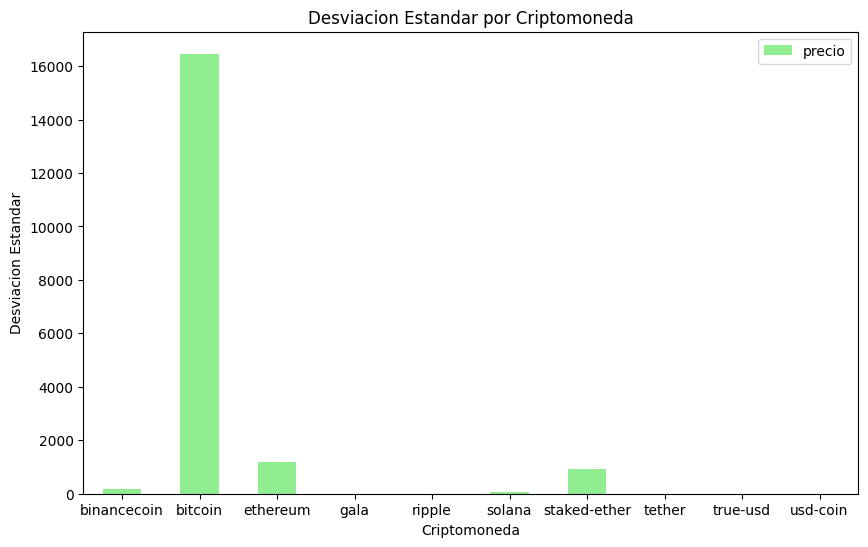

In [237]:
import matplotlib.pyplot as plt

df = serie_cartera_cripto.groupby('id')['precio'].std().reset_index()
ax = df.plot(kind='bar', x='id', y='precio', rot=0, color='lightgreen', figsize=(10, 6))
ax.set_xlabel("Criptomoneda")
ax.set_ylabel("Desviacion Estandar")
ax.set_title("Desviacion Estandar por Criptomoneda")
plt.show()

La comparación visual de los valores de desviación estándar para cada criptomoneda puede proporcionar información sobre la volatilidad de los precios de cada criptomoneda en su cartera. Las criptomonedas con una desviación estándar más alta, que en nuestro caso es por una enorme diferencia Bitcoin, pueden ser más volátiles y, por lo tanto, más arriesgadas. Es decir que el Bitcoin, en el periodo analizado (ultimos 5 años), ha tenido una variacion muy grande en sus precios. 
Por otro lado, las criptomonedas con una desviación estándar más baja pueden ser menos volátiles y, por lo tanto, menos arriesgadas. 
## La preferencia por una criptomoneda con mayor o menos volatilidad dependera de la tolerancia al riesgo y del plazo de permanencia en cartera en el caso de cada inversor.

# 9.2. Capitalizacion de mercado.

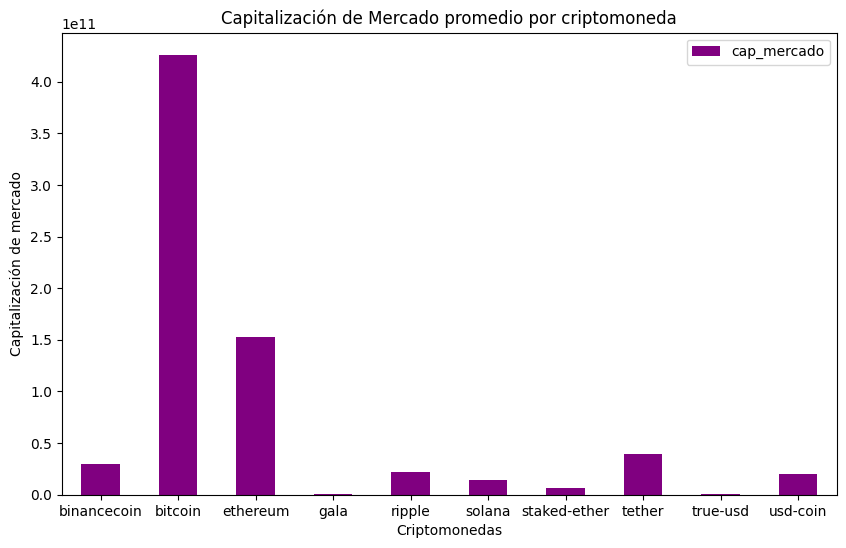

In [238]:
df = serie_cartera_cripto.groupby('id')['cap_mercado'].mean().reset_index()
ax = df.plot(kind='bar', x='id', y='cap_mercado', rot=0, color='purple', figsize=(10, 6))
ax.set_xlabel("Criptomonedas")
ax.set_ylabel("Capitalización de mercado")
ax.set_title("Capitalización de Mercado promedio por criptomoneda")
plt.show()



La capitalización de mercado es un indicador que mide y sigue el valor de mercado de una criptomoneda. La capitalización de mercado se utiliza como indicador del dominio y la popularidad de las criptomonedas. Es importante porque puede ayudar a los inversores a evaluar el tamaño y la estabilidad de una criptomoneda en el mercado.

Sobre la base de el grafico anterior, podemos ver que respecto a este KPI las mejores opciones son Bitcoin, Ethereum y BNB, siendo claramente la primera la de mejor performance en este aspecto.

# 9.3. Volumen Total de Operacion.

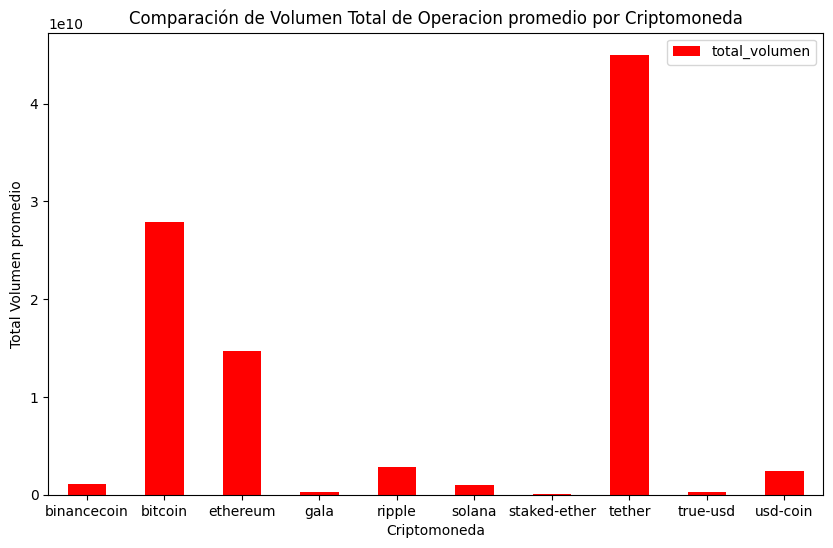

In [239]:
df = serie_cartera_cripto.groupby('id')['total_volumen'].mean().reset_index()
ax = df.plot(kind='bar', x='id', y='total_volumen', rot=0, color='red', figsize=(10, 6))
ax.set_xlabel("Criptomoneda")
ax.set_ylabel("Total Volumen promedio")
ax.set_title("Comparación de Volumen Total de Operacion promedio por Criptomoneda")
plt.show()

El volumen de operaciones es importante porque indica la cantidad de criptomonedas que se compran y venden en un período de tiempo determinado. Un alto volumen de operaciones puede indicar una mayor liquidez y demanda de una criptomoneda. En este caso, siempre para el plazo definido (ultimos 5 años), las criptomonedas con mayor liquidez han sido Tether, Bitcoin y Ethereum, en ese orden. 
Vale aclarar que la mayor o menor liquidez esta vinclulada con la facilidad para adquirir o desprenderse a una criptomoneda, lo que puede deverse a una fluctuacion elevada en el precio.

Dicho de otra manera, una mayor liquidez puede reflejar una mayor fluctuacion o inestabilidad en los precios, subrrayando que no es la liquidez la unica indicadora de esto último.

